In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import anndata
import scanpy as sc
from ALLCools.mcds import MCDS
from ALLCools.clustering import tsne, significant_pc_test, filter_regions, remove_black_list_region, lsi, binarize_matrix
from ALLCools.plot import *
import matplotlib as mpl
mpl.style.use('default')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica'

In [2]:
from ALLCools.clustering import tsne, significant_pc_test, log_scale

In [3]:
metadata = pd.read_csv('../metadata/GBM_metadata_9samples.csv', index_col = 0)
metadata

,Plate,PCRIndex,MultiplexGroup,RandomIndex,Col384,Row384,R1InputReads,R1InputReadsBP,R1WithAdapters,R1QualTrimBP,...,chr18_3c,chr11_3c,chr15_3c,chr16_3c,chr19_3c,chr20_3c,chrX_3c,chr21_3c,chr22_3c,type
cell,,,,,,,,,,,,,,,,,,,,,
GBM_BT00009_Plate1-1-J2-A13,GBM_BT00009_Plate1,J2,1.0,A13,12.0,0.0,543811.0,75960330.0,329.0,130615.0,...,-0.169119,0.514556,-0.305797,-0.664611,-0.963400,-0.715979,-0.404173,-1.606505,-2.007092,malignant
GBM_BT00009_Plate1-1-J2-A14,GBM_BT00009_Plate1,J2,1.0,A14,13.0,0.0,1443841.0,205273886.0,871.0,450225.0,...,-0.331649,0.655225,-0.537022,-1.080347,-1.108881,-0.709778,-0.114430,-1.569391,-1.863723,malignant
GBM_BT00009_Plate1-1-J2-A1,GBM_BT00009_Plate1,J2,1.0,A1,0.0,0.0,1377070.0,195737508.0,790.0,417027.0,...,-0.674835,0.349795,-0.613550,-0.738597,-1.197165,-1.017747,-0.358494,-2.071587,-2.018895,non-malignant
GBM_BT00009_Plate1-1-J2-A2,GBM_BT00009_Plate1,J2,1.0,A2,1.0,0.0,1477121.0,209863296.0,1292.0,445281.0,...,-0.349739,0.642446,-0.353793,-1.160127,-0.898876,-0.670579,-0.289377,-1.697402,-1.799478,malignant
GBM_BT00009_Plate1-1-J2-B13,GBM_BT00009_Plate1,J2,1.0,B13,12.0,1.0,1424683.0,202180075.0,785.0,394992.0,...,-0.264942,0.758346,-0.422850,-1.248449,-1.067373,-0.706157,-0.348405,-1.774896,-1.533435,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BT0010_AR_Plate8-6-G10-O24,BT0010_AR_Plate8,G10,6.0,O24,23.0,14.0,2175912.0,309429847.0,1598.0,879107.0,...,-0.581149,0.481482,-0.460198,-0.486735,-1.550918,-0.513349,-0.380735,-2.178870,-1.792252,malignant
BT0010_AR_Plate8-6-G10-P11,BT0010_AR_Plate8,G10,6.0,P11,10.0,15.0,2564295.0,364706998.0,2144.0,1155269.0,...,-0.430892,0.395026,-0.427256,-0.423991,-1.515536,-0.815973,-0.319431,-2.199281,-1.762854,malignant
BT0010_AR_Plate8-6-G10-P12,BT0010_AR_Plate8,G10,6.0,P12,11.0,15.0,2563648.0,364577406.0,1772.0,863481.0,...,-0.627004,0.697641,-0.404231,-0.509844,-1.327841,-0.808388,-0.380319,-1.580718,-1.894935,malignant


In [28]:
mcds = MCDS.open('/gale/netapp/entex/GBM/*/matrix/*.mcds', var_dim='chrom100k')
mcds

<xarray.MCDS>
Dimensions:          (mc_type: 2, cell: 14345, chrom100k: 30895, count_type: 2)
Coordinates:
  * mc_type          (mc_type) <U3 'CGN' 'CHN'
  * cell             (cell) <U37 'GBM_BT00009_Plate1-1-J2-A13' ... 'BT0010_AR...
  * chrom100k        (chrom100k) <U10 'chr1_0' 'chr1_1' ... 'chrY_572'
    chrom100k_chrom  (chrom100k) <U5 dask.array<chunksize=(30895,), meta=np.ndarray>
    chrom100k_end    (chrom100k) int64 dask.array<chunksize=(30895,), meta=np.ndarray>
    chrom100k_start  (chrom100k) int64 dask.array<chunksize=(30895,), meta=np.ndarray>
  * count_type       (count_type) <U3 'mc' 'cov'
Data variables:
    chrom100k_da     (cell, chrom100k, mc_type, count_type) uint32 dask.array<chunksize=(260, 30895, 2, 2), meta=np.ndarray>
Attributes:
    obs_dim:  cell
    var_dim:  chrom100k

In [29]:
mcds.add_cell_metadata(metadata)
selc = metadata.index
mcds = mcds.sel(cell = mcds.get_index('cell').intersection(selc))
mcds = mcds.remove_black_list_region(black_list_path='/gale/netapp/home/hanliu/ref/blacklist/hg38-blacklist.v2.bed.gz')


2408 chrom100k features removed due to overlapping (bedtools intersect -f 0.2) with black list regions.


# calculate chromosome mcg fraction

In [26]:
mcds_chr = mcds.sel(chrom100k= (mcds['chrom100k_chrom'].values=='chr10'), mc_type = 'CGN')
mcg_df = mcds_chr.sel(count_type = 'mc').sum(dim='chrom100k').to_pandas()
covcg_df = mcds_chr.sel(count_type = 'cov').sum(dim='chrom100k').to_pandas()
chr10 = mcg_df['chrom100k_da'].div(covcg_df['chrom100k_da'])
chr10

cell
GBM_BT00009_Plate1-1-J2-A13    0.713788
GBM_BT00009_Plate1-1-J2-A14    0.725318
GBM_BT00009_Plate1-1-J2-A1     0.803192
GBM_BT00009_Plate1-1-J2-A2     0.726865
GBM_BT00009_Plate1-1-J2-B13    0.718965
                                 ...   
BT0010_AR_Plate8-6-G10-O24     0.826341
BT0010_AR_Plate8-6-G10-P11     0.807804
BT0010_AR_Plate8-6-G10-P12     0.830639
BT0010_AR_Plate8-6-G10-P23     0.768023
BT0010_AR_Plate8-6-G10-P24     0.816844
Name: chrom100k_da, Length: 11053, dtype: float64

In [33]:
chr10 = pd.DataFrame(chr10)
chr10.columns = ['chr10_mcg']
chr10

,chr10_mcg
cell,
GBM_BT00009_Plate1-1-J2-A13,0.713788
GBM_BT00009_Plate1-1-J2-A14,0.725318
GBM_BT00009_Plate1-1-J2-A1,0.803192
GBM_BT00009_Plate1-1-J2-A2,0.726865
GBM_BT00009_Plate1-1-J2-B13,0.718965
...,...
BT0010_AR_Plate8-6-G10-O24,0.826341
BT0010_AR_Plate8-6-G10-P11,0.807804
BT0010_AR_Plate8-6-G10-P12,0.830639


In [35]:
mcds_chr = mcds.sel(chrom100k= (mcds['chrom100k_chrom'].values=='chr1'), mc_type = 'CGN')
mcg_df = mcds_chr.sel(count_type = 'mc').sum(dim='chrom100k').to_pandas()
covcg_df = mcds_chr.sel(count_type = 'cov').sum(dim='chrom100k').to_pandas()
chrm =pd.DataFrame( mcg_df['chrom100k_da'].div(covcg_df['chrom100k_da']))
chrm.columns = ['chr1_mcg']
chr10 = chr10.join(chrm)
mcds_chr = mcds.sel(chrom100k= (mcds['chrom100k_chrom'].values=='chr7'), mc_type = 'CGN')
mcg_df = mcds_chr.sel(count_type = 'mc').sum(dim='chrom100k').to_pandas()
covcg_df = mcds_chr.sel(count_type = 'cov').sum(dim='chrom100k').to_pandas()
chrm = pd.DataFrame(mcg_df['chrom100k_da'].div(covcg_df['chrom100k_da']))
chrm.columns = ['chr7_mcg']
chr10 = chr10.join(chrm)
chr10

,chr10_mcg,chrom100k_da,chr1_mcg,chr7_mcg
cell,,,,
GBM_BT00009_Plate1-1-J2-A13,0.713788,0.697112,0.697112,0.707027
GBM_BT00009_Plate1-1-J2-A14,0.725318,0.717297,0.717297,0.732899
GBM_BT00009_Plate1-1-J2-A1,0.803192,0.788260,0.788260,0.809572
GBM_BT00009_Plate1-1-J2-A2,0.726865,0.708662,0.708662,0.724479
GBM_BT00009_Plate1-1-J2-B13,0.718965,0.705868,0.705868,0.719269
...,...,...,...,...
BT0010_AR_Plate8-6-G10-O24,0.826341,0.799069,0.799069,0.817509
BT0010_AR_Plate8-6-G10-P11,0.807804,0.788345,0.788345,0.804537
BT0010_AR_Plate8-6-G10-P12,0.830639,0.805095,0.805095,0.824319


In [36]:
mcg_chr10 = chr10.join(metadata[['type','Sample','mCGmC', 'mCGCov', 'mCGFrac']])
mcg_chr10

,chr10_mcg,chrom100k_da,chr1_mcg,chr7_mcg,type,Sample,mCGmC,mCGCov,mCGFrac
cell,,,,,,,,,
GBM_BT00009_Plate1-1-J2-A13,0.713788,0.697112,0.697112,0.707027,malignant,GBM_BT00009,422258.0,617300.0,0.684040
GBM_BT00009_Plate1-1-J2-A14,0.725318,0.717297,0.717297,0.732899,malignant,GBM_BT00009,1291647.0,1795842.0,0.719243
GBM_BT00009_Plate1-1-J2-A1,0.803192,0.788260,0.788260,0.809572,non-malignant,GBM_BT00009,1385482.0,1742671.0,0.795034
GBM_BT00009_Plate1-1-J2-A2,0.726865,0.708662,0.708662,0.724479,malignant,GBM_BT00009,1252881.0,1763582.0,0.710418
GBM_BT00009_Plate1-1-J2-B13,0.718965,0.705868,0.705868,0.719269,malignant,GBM_BT00009,1201461.0,1717427.0,0.699570
...,...,...,...,...,...,...,...,...,...
BT0010_AR_Plate8-6-G10-O24,0.826341,0.799069,0.799069,0.817509,malignant,BT0010_AR,1969466.0,2452807.0,0.802944
BT0010_AR_Plate8-6-G10-P11,0.807804,0.788345,0.788345,0.804537,malignant,BT0010_AR,2241847.0,2845655.0,0.787814
BT0010_AR_Plate8-6-G10-P12,0.830639,0.805095,0.805095,0.824319,malignant,BT0010_AR,2336266.0,2889914.0,0.808421


# with normalization within cells

In [5]:
mcds.add_mc_frac(
normalize_per_cell=True,  # after calculating mC frac, per cell normalize the matrix
    clip_norm_value=10  # clip outlier values above 10 to 10
)

In [8]:
mcds['chrom100k_da_frac'].load()

/gale/netapp/home2/yuwu/miniconda3/envs/allcools/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


<xarray.DataArray 'chrom100k_da_frac' (cell: 11053, chrom100k: 28494, mc_type: 2)>
array([[[ 1.10148838,  0.08830935],
        [ 0.63365123,  1.68836229],
        [ 0.78231688, 10.        ],
        ...,
        [ 0.76472605,  0.16118347],
        [ 0.76471606,  0.825499  ],
        [ 0.59987324,  1.92733326]],

       [[ 0.61668452,  0.64236307],
        [ 0.51659068,  1.07212853],
        [ 0.65079534,  0.70594553],
        ...,
        [ 0.76088472,  0.38073664],
        [ 0.70292567,  0.92830244],
        [ 0.49130926,  0.98974776]],

       [[ 0.98639084,  0.44719975],
        [ 0.70917085,  0.65312329],
        [ 0.76972477,  1.26241142],
        ...,
...
        ...,
        [ 0.97388283,  0.70143464],
        [ 0.7178507 ,  0.37400117],
        [ 0.74764425,  0.3463932 ]],

       [[ 1.02031802,  0.72609482],
        [ 0.70451621,  0.95550597],
        [ 0.86651511,  0.54452393],
        ...,
        [ 1.06990411,  0.85301645],
        [ 0.8736072 ,  1.12021584],
        [ 0.92141558,  0.75672795]],

       [[ 0.59617456,  0.91630379],
        [ 0.92739111,  0.65047941],
        [ 0.77432418,  0.94365201],
        ...,
        [ 1.03905366,  0.64419517],
        [ 0.92751263,  0.45337039],
        [ 0.75316161,  0.63321192]]])
Coordinates: (12/107)
  * mc_type                   (mc_type) <U3 'CGN' 'CHN'
  * cell                      (cell) object 'GBM_BT00009_Plate1-1-J2-A13' ......
  * chrom100k                 (chrom100k) <U10 'chr1_8' 'chr1_9' ... 'chrY_265'
    chrom100k_chrom           (chrom100k) <U5 'chr1' 'chr1' ... 'chrY' 'chrY'
    chrom100k_end             (chrom100k) int64 900000 1000000 ... 26600000
    chrom100k_start           (chrom100k) int64 800000 900000 ... 26500000
    ...                        ...
    cell_chr19_3c             (cell) float64 -0.9634 -1.109 ... -0.9354 -1.513
    cell_chr20_3c             (cell) float64 -0.716 -0.7098 ... -0.8856 -0.683
    cell_chrX_3c              (cell) float64 -0.4042 -0.1144 ... -0.5174 -0.6492
    cell_chr21_3c             (cell) float64 -1.607 -1.569 ... -2.467 -2.227
    cell_chr22_3c             (cell) float64 -2.007 -1.864 ... -1.73 -1.599
    cell_type                 (cell) object 'malignant' ... 'malignant'

In [16]:
mch_adata = mcds.get_adata(mc_type='CHN',
                           var_dim='chrom100k',
                           select_hvf=False)
#log_scale(mch_adata)
mch_adata

/gale/netapp/home2/yuwu/miniconda3/envs/allcools/lib/python3.8/site-packages/ALLCools/mcds/mcds.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  obs_df[coord_prefix.sub("", k)] = series


AnnData object with n_obs × n_vars = 11053 × 28494
    obs: 'Plate', 'PCRIndex', 'MultiplexGroup', 'RandomIndex', 'Col384', 'Row384', 'R1InputReads', 'R1InputReadsBP', 'R1WithAdapters', 'R1QualTrimBP', 'R1TrimmedReads', 'R1TrimmedReadsBP', 'R1TrimmedReadsRate', 'R1UniqueMappedReads', 'R1DeduppedReads', 'R2InputReads', 'R2InputReadsBP', 'R2WithAdapters', 'R2QualTrimBP', 'R2TrimmedReads', 'R2TrimmedReadsBP', 'R2TrimmedReadsRate', 'R2UniqueMappedReads', 'R2DeduppedReads', 'CisShortContact', 'CisLongContact', 'TransContact', 'mCHmC', 'mCHCov', 'mCHFrac', 'mCGmC', 'mCGCov', 'mCGFrac', 'mCCCmC', 'mCCCCov', 'mCCCFrac', 'GenomeCov', 'LambdaCYFrac', 'LambdaCYCov', 'FinalmCReads', 'CellInputReadPairs', 'R1MappingRate', 'R2MappingRate', 'R1DuplicationRate', 'R2DuplicationRate', 'CellBarcodeRatio', 'TotalContacts', 'CisShortRatio', 'CisLongRatio', 'TransRatio', 'Sample', 'umap_0', 'umap_1', 'leiden', '5k_leiden', 'chr1mcgcov', 'chr2mcgcov', 'chr3mcgcov', 'chr4mcgcov', 'chr5mcgcov', 'chr6mcgcov', '

In [17]:
mcg_adata = mcds.get_adata(mc_type='CGN',
                           var_dim='chrom100k',
                           select_hvf=False)
#log_scale(mcg_adata)
mcg_adata

/gale/netapp/home2/yuwu/miniconda3/envs/allcools/lib/python3.8/site-packages/ALLCools/mcds/mcds.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  obs_df[coord_prefix.sub("", k)] = series


AnnData object with n_obs × n_vars = 11053 × 28494
    obs: 'Plate', 'PCRIndex', 'MultiplexGroup', 'RandomIndex', 'Col384', 'Row384', 'R1InputReads', 'R1InputReadsBP', 'R1WithAdapters', 'R1QualTrimBP', 'R1TrimmedReads', 'R1TrimmedReadsBP', 'R1TrimmedReadsRate', 'R1UniqueMappedReads', 'R1DeduppedReads', 'R2InputReads', 'R2InputReadsBP', 'R2WithAdapters', 'R2QualTrimBP', 'R2TrimmedReads', 'R2TrimmedReadsBP', 'R2TrimmedReadsRate', 'R2UniqueMappedReads', 'R2DeduppedReads', 'CisShortContact', 'CisLongContact', 'TransContact', 'mCHmC', 'mCHCov', 'mCHFrac', 'mCGmC', 'mCGCov', 'mCGFrac', 'mCCCmC', 'mCCCCov', 'mCCCFrac', 'GenomeCov', 'LambdaCYFrac', 'LambdaCYCov', 'FinalmCReads', 'CellInputReadPairs', 'R1MappingRate', 'R2MappingRate', 'R1DuplicationRate', 'R2DuplicationRate', 'CellBarcodeRatio', 'TotalContacts', 'CisShortRatio', 'CisLongRatio', 'TransRatio', 'Sample', 'umap_0', 'umap_1', 'leiden', '5k_leiden', 'chr1mcgcov', 'chr2mcgcov', 'chr3mcgcov', 'chr4mcgcov', 'chr5mcgcov', 'chr6mcgcov', '

In [39]:
chr10 = mcg_adata[:,mcg_adata.var['chrom']=='chr10']
mcg_chr10 = pd.DataFrame( {'chr10_mcg': chr10.X.mean(axis = 1)}, index = chr10.obs.index)
mcg_chr10 = mcg_chr10.join(metadata[['type','Sample','mCGmC', 'mCGCov', 'mCGFrac']])
mcg_chr10

,chr10_mcg,type,Sample,mCGmC,mCGCov,mCGFrac
cell,,,,,,
GBM_BT00009_Plate1-1-J2-A13,1.014008,malignant,GBM_BT00009,422258.0,617300.0,0.684040
GBM_BT00009_Plate1-1-J2-A14,0.997400,malignant,GBM_BT00009,1291647.0,1795842.0,0.719243
GBM_BT00009_Plate1-1-J2-A1,0.998946,non-malignant,GBM_BT00009,1385482.0,1742671.0,0.795034
GBM_BT00009_Plate1-1-J2-A2,1.001853,malignant,GBM_BT00009,1252881.0,1763582.0,0.710418
GBM_BT00009_Plate1-1-J2-B13,1.012557,malignant,GBM_BT00009,1201461.0,1717427.0,0.699570
...,...,...,...,...,...,...
BT0010_AR_Plate8-6-G10-O24,1.001359,malignant,BT0010_AR,1969466.0,2452807.0,0.802944
BT0010_AR_Plate8-6-G10-P11,1.000623,malignant,BT0010_AR,2241847.0,2845655.0,0.787814
BT0010_AR_Plate8-6-G10-P12,1.000125,malignant,BT0010_AR,2336266.0,2889914.0,0.808421


In [37]:
sample = 'CW_2209'
baseline = mcg_chr10[(mcg_chr10['type']=='non-malignant')&mcg_chr10['Sample']== sample]['chr10_mcg'].mean()
mcg_chr10['chr10mcg_cancer-normal'] = mcg_chr10['chr10_mcg'] - baseline
mcg_chr10

,chr10_mcg,chrom100k_da,chr1_mcg,chr7_mcg,type,Sample,mCGmC,mCGCov,mCGFrac,chr10mcg_cancer-normal
cell,,,,,,,,,,
GBM_BT00009_Plate1-1-J2-A13,0.713788,0.697112,0.697112,0.707027,malignant,GBM_BT00009,422258.0,617300.0,0.684040,-0.035546
GBM_BT00009_Plate1-1-J2-A14,0.725318,0.717297,0.717297,0.732899,malignant,GBM_BT00009,1291647.0,1795842.0,0.719243,-0.024017
GBM_BT00009_Plate1-1-J2-A1,0.803192,0.788260,0.788260,0.809572,non-malignant,GBM_BT00009,1385482.0,1742671.0,0.795034,0.053858
GBM_BT00009_Plate1-1-J2-A2,0.726865,0.708662,0.708662,0.724479,malignant,GBM_BT00009,1252881.0,1763582.0,0.710418,-0.022469
GBM_BT00009_Plate1-1-J2-B13,0.718965,0.705868,0.705868,0.719269,malignant,GBM_BT00009,1201461.0,1717427.0,0.699570,-0.030369
...,...,...,...,...,...,...,...,...,...,...
BT0010_AR_Plate8-6-G10-O24,0.826341,0.799069,0.799069,0.817509,malignant,BT0010_AR,1969466.0,2452807.0,0.802944,0.077007
BT0010_AR_Plate8-6-G10-P11,0.807804,0.788345,0.788345,0.804537,malignant,BT0010_AR,2241847.0,2845655.0,0.787814,0.058469
BT0010_AR_Plate8-6-G10-P12,0.830639,0.805095,0.805095,0.824319,malignant,BT0010_AR,2336266.0,2889914.0,0.808421,0.081304


In [38]:
mcg_df = mcg_chr10

In [ ]:
chr10 = mcg_adata[:,mcg_adata.var['chrom']=='chr7']
mcg_chr7 = pd.DataFrame( {'chr7_mcg': chr10.X.mean(axis = 1)}, index = chr10.obs.index)
mcg_chr10 = mcg_chr10.join(mcg_chr7)

In [39]:
baseline = mcg_chr10[mcg_chr10['type']=='non-malignant']['chr7_mcg'].mean()
mcg_chr10['chr7mcg_cancer-normal'] = mcg_chr10['chr7_mcg'] - baseline
mcg_chr10

,chr10_mcg,chrom100k_da,chr1_mcg,chr7_mcg,type,Sample,mCGmC,mCGCov,mCGFrac,chr10mcg_cancer-normal,chr7mcg_cancer-normal
cell,,,,,,,,,,,
GBM_BT00009_Plate1-1-J2-A13,0.713788,0.697112,0.697112,0.707027,malignant,GBM_BT00009,422258.0,617300.0,0.684040,-0.035546,-0.047869
GBM_BT00009_Plate1-1-J2-A14,0.725318,0.717297,0.717297,0.732899,malignant,GBM_BT00009,1291647.0,1795842.0,0.719243,-0.024017,-0.021997
GBM_BT00009_Plate1-1-J2-A1,0.803192,0.788260,0.788260,0.809572,non-malignant,GBM_BT00009,1385482.0,1742671.0,0.795034,0.053858,0.054676
GBM_BT00009_Plate1-1-J2-A2,0.726865,0.708662,0.708662,0.724479,malignant,GBM_BT00009,1252881.0,1763582.0,0.710418,-0.022469,-0.030417
GBM_BT00009_Plate1-1-J2-B13,0.718965,0.705868,0.705868,0.719269,malignant,GBM_BT00009,1201461.0,1717427.0,0.699570,-0.030369,-0.035627
...,...,...,...,...,...,...,...,...,...,...,...
BT0010_AR_Plate8-6-G10-O24,0.826341,0.799069,0.799069,0.817509,malignant,BT0010_AR,1969466.0,2452807.0,0.802944,0.077007,0.062613
BT0010_AR_Plate8-6-G10-P11,0.807804,0.788345,0.788345,0.804537,malignant,BT0010_AR,2241847.0,2845655.0,0.787814,0.058469,0.049641
BT0010_AR_Plate8-6-G10-P12,0.830639,0.805095,0.805095,0.824319,malignant,BT0010_AR,2336266.0,2889914.0,0.808421,0.081304,0.069424


In [ ]:
chr10 = mcg_adata[:,mcg_adata.var['chrom']=='chr1']
mcg_chr1 = pd.DataFrame( {'chr1_mcg': chr10.X.mean(axis = 1)}, index = chr10.obs.index)
mcg_chr10 = mcg_chr10.join(mcg_chr1)

In [40]:
baseline = mcg_chr10[mcg_chr10['type']=='non-malignant']['chr1_mcg'].mean()
mcg_chr10['chr1mcg_cancer-normal'] = mcg_chr10['chr1_mcg'] - baseline
mcg_chr10

,chr10_mcg,chrom100k_da,chr1_mcg,chr7_mcg,type,Sample,mCGmC,mCGCov,mCGFrac,chr10mcg_cancer-normal,chr7mcg_cancer-normal,chr1mcg_cancer-normal
cell,,,,,,,,,,,,
GBM_BT00009_Plate1-1-J2-A13,0.713788,0.697112,0.697112,0.707027,malignant,GBM_BT00009,422258.0,617300.0,0.684040,-0.035546,-0.047869,-0.036774
GBM_BT00009_Plate1-1-J2-A14,0.725318,0.717297,0.717297,0.732899,malignant,GBM_BT00009,1291647.0,1795842.0,0.719243,-0.024017,-0.021997,-0.016589
GBM_BT00009_Plate1-1-J2-A1,0.803192,0.788260,0.788260,0.809572,non-malignant,GBM_BT00009,1385482.0,1742671.0,0.795034,0.053858,0.054676,0.054374
GBM_BT00009_Plate1-1-J2-A2,0.726865,0.708662,0.708662,0.724479,malignant,GBM_BT00009,1252881.0,1763582.0,0.710418,-0.022469,-0.030417,-0.025224
GBM_BT00009_Plate1-1-J2-B13,0.718965,0.705868,0.705868,0.719269,malignant,GBM_BT00009,1201461.0,1717427.0,0.699570,-0.030369,-0.035627,-0.028018
...,...,...,...,...,...,...,...,...,...,...,...,...
BT0010_AR_Plate8-6-G10-O24,0.826341,0.799069,0.799069,0.817509,malignant,BT0010_AR,1969466.0,2452807.0,0.802944,0.077007,0.062613,0.065183
BT0010_AR_Plate8-6-G10-P11,0.807804,0.788345,0.788345,0.804537,malignant,BT0010_AR,2241847.0,2845655.0,0.787814,0.058469,0.049641,0.054459
BT0010_AR_Plate8-6-G10-P12,0.830639,0.805095,0.805095,0.824319,malignant,BT0010_AR,2336266.0,2889914.0,0.808421,0.081304,0.069424,0.071209


In [56]:
sample = 'CW_2209'
baseline = mcg_chr10[(mcg_chr10['type']=='non-malignant')]['chr10_mcg'].mean()
mcg_chr10['chr10mcg_cancer-normal'] = mcg_chr10['chr10_mcg'] - baseline

baseline = mcg_chr10[(mcg_chr10['type']=='non-malignant')]['chr7_mcg'].mean()
mcg_chr10['chr7mcg_cancer-normal'] = mcg_chr10['chr7_mcg'] - baseline

baseline = mcg_chr10[(mcg_chr10['type']=='non-malignant')]['chr1_mcg'].mean()
mcg_chr10['chr1mcg_cancer-normal'] = mcg_chr10['chr1_mcg'] - baseline


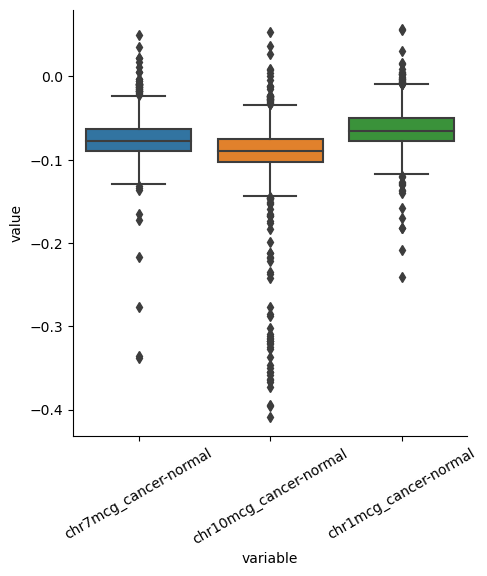

In [57]:
tmp = mcg_chr10[['chr7mcg_cancer-normal','chr10mcg_cancer-normal',
                  'chr1mcg_cancer-normal','Sample','type']]
tmp = tmp[(tmp['Sample'] == sample)&(tmp['type'] == 'malignant')]

tmp = pd.melt(tmp,id_vars=['Sample','type'], value_vars = ['chr7mcg_cancer-normal','chr10mcg_cancer-normal',
                  'chr1mcg_cancer-normal'])

ax = sns.catplot(data = tmp, kind = 'box', x='variable', y = 'value')
ax.set_xticklabels(ax.axes.flat[0].get_xticklabels(),rotation = 30)


In [ ]:
chr7 = mcg_adata[:,mcg_adata.var['chrom']=='chr7']

# chr7 CNV

In [80]:
mcds_chr = mcds.sel(chrom100k= (mcds['chrom100k_chrom'].values=='chr1'), mc_type = 'CGN')
mcds_chr

<xarray.MCDS>
Dimensions:                   (cell: 11053, chrom100k: 2259, count_type: 2)
Coordinates: (12/108)
    mc_type                   <U3 'CGN'
  * cell                      (cell) object 'GBM_BT00009_Plate1-1-J2-A13' ......
  * chrom100k                 (chrom100k) <U10 'chr1_8' 'chr1_9' ... 'chr1_2488'
    chrom100k_chrom           (chrom100k) <U5 dask.array<chunksize=(2259,), meta=np.ndarray>
    chrom100k_end             (chrom100k) int64 dask.array<chunksize=(2259,), meta=np.ndarray>
    chrom100k_start           (chrom100k) int64 dask.array<chunksize=(2259,), meta=np.ndarray>
    ...                        ...
    cell_chr19_3c             (cell) float64 -0.9634 -1.109 ... -0.9354 -1.513
    cell_chr20_3c             (cell) float64 -0.716 -0.7098 ... -0.8856 -0.683
    cell_chrX_3c              (cell) float64 -0.4042 -0.1144 ... -0.5174 -0.6492
    cell_chr21_3c             (cell) float64 -1.607 -1.569 ... -2.467 -2.227
    cell_chr22_3c             (cell) float64 -2.007 -1.864 ... -1.73 -1.599
    cell_type                 (cell) object 'malignant' ... 'malignant'
Data variables:
    chrom100k_da              (cell, chrom100k, count_type) uint32 dask.array<chunksize=(235, 2259, 2), meta=np.ndarray>
Attributes:
    obs_dim:  cell
    var_dim:  chrom100k

In [81]:
mcds_7_1 = mcds_chr.sel(chrom100k = mcds_chr['chrom100k'][:1200],count_type = 'mc').sum(dim='chrom100k').to_pandas()
mcds_7_2 = mcds_chr.sel(chrom100k = mcds_chr['chrom100k'][1200:],count_type = 'mc').sum(dim='chrom100k').to_pandas()
covcg_df_1 = mcds_chr.sel(chrom100k = mcds_chr['chrom100k'][:1200],count_type = 'cov').sum(dim='chrom100k').to_pandas()
covcg_df_2 = mcds_chr.sel(chrom100k = mcds_chr['chrom100k'][1200:],count_type = 'cov').sum(dim='chrom100k').to_pandas()
chrm_1 = pd.DataFrame(mcds_7_1['chrom100k_da'].div(covcg_df_1['chrom100k_da']))
chrm_1.columns = ['chr7_1_mcg']
chrm_2 = pd.DataFrame(mcds_7_2['chrom100k_da'].div(covcg_df_2['chrom100k_da']))
chrm_2.columns = ['chr7_2_mcg']

chrm7 = chrm_1.join(chrm_2)
chrm7 = chrm7.join(metadata[['type','Sample']])
chrm7

,chr7_1_mcg,chr7_2_mcg,type,Sample
cell,,,,
GBM_BT00009_Plate1-1-J2-A13,0.690959,0.704896,malignant,GBM_BT00009
GBM_BT00009_Plate1-1-J2-A14,0.708756,0.729445,malignant,GBM_BT00009
GBM_BT00009_Plate1-1-J2-A1,0.785272,0.792551,non-malignant,GBM_BT00009
GBM_BT00009_Plate1-1-J2-A2,0.698712,0.722431,malignant,GBM_BT00009
GBM_BT00009_Plate1-1-J2-B13,0.689125,0.721948,malignant,GBM_BT00009
...,...,...,...,...
BT0010_AR_Plate8-6-G10-O24,0.791662,0.804501,malignant,BT0010_AR
BT0010_AR_Plate8-6-G10-P11,0.783986,0.791502,malignant,BT0010_AR
BT0010_AR_Plate8-6-G10-P12,0.799389,0.809297,malignant,BT0010_AR


In [82]:

baseline = chrm7[(chrm7['type']=='non-malignant')]['chr7_1_mcg'].mean()
chrm7['chr7_1_mcg_cancer-normal'] = chrm7['chr7_1_mcg'] - baseline

baseline = chrm7[(chrm7['type']=='non-malignant')]['chr7_2_mcg'].mean()
chrm7['chr7_2_mcg_cancer-normal'] = chrm7['chr7_2_mcg'] - baseline


In [79]:
tmp

,Sample,type,variable,value
0,CCF_3571,malignant,chr7_1_mcg_cancer-normal,0.053801
1,CCF_3571,malignant,chr7_1_mcg_cancer-normal,0.059610
2,CCF_3571,malignant,chr7_1_mcg_cancer-normal,0.041337
3,CCF_3571,malignant,chr7_1_mcg_cancer-normal,0.061610
4,CCF_3571,malignant,chr7_1_mcg_cancer-normal,0.054314
...,...,...,...,...
1735,CCF_3571,malignant,chr7_2_mcg_cancer-normal,0.089164
1736,CCF_3571,malignant,chr7_2_mcg_cancer-normal,0.089138
1737,CCF_3571,malignant,chr7_2_mcg_cancer-normal,0.088543
1738,CCF_3571,malignant,chr7_2_mcg_cancer-normal,0.103194


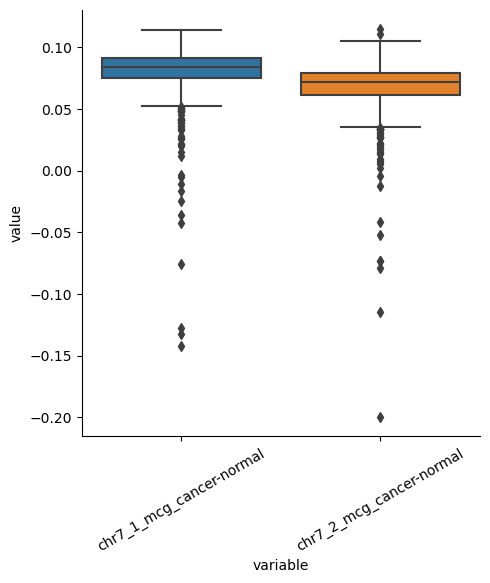

In [84]:
sample = 'CCF_3571'
tmp = chrm7[['chr7_1_mcg_cancer-normal','chr7_2_mcg_cancer-normal',
                  'Sample','type']]
tmp = tmp[(tmp['Sample'] == sample)&(tmp['type'] == 'malignant')]

tmp = pd.melt(tmp,id_vars=['Sample','type'], value_vars = ['chr7_1_mcg_cancer-normal','chr7_2_mcg_cancer-normal'])

ax = sns.catplot(data = tmp, kind = 'box', x='variable', y = 'value')
ax.set_xticklabels(ax.axes.flat[0].get_xticklabels(),rotation = 30)


In [71]:
from scipy.stats import wilcoxon
a = tmp[tmp['variable']=='chr7_1_mcg_cancer-normal']['value']
b = tmp[tmp['variable']=='chr7_2_mcg_cancer-normal']['value']
wilcoxon(a,b)

WilcoxonResult(statistic=152519.0, pvalue=5.667377994718764e-23)